#sklearn 데이터 전처리 스케일 조정

https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=demian7607&logNo=222009975984

많은 상황에서 데이터 스케일 조정이 필요한 경우가 있다

예를들어
* 분석시에 변수들이 너무 스케일이 다를 경우
  * 변수들의 단위 차이로 인해 숫자의 스케일이 크게 달라지는 경우

* 신경망 학습시에
  * 데이터셋의 값이 들쑥날쑥하거나, 매우 큰 경우에는 cost의 값이 발산하여 정상적인 학습이 이루어지지 않는다

스케일링은 다차원의 값들을 비교 분석하기 쉽게 만들어주며, 자료의 오버플로우(overflow)나 언더플로우(underflow)를 방지 하고, 독립 변수의 공분산 행렬의 조건수(condition number)를 감소시켜 최적화 과정에서의 안정성 및 수렴 속도를 향상 시킨다.

특히 k-means 등 거리 기반의 모델에서는 스케일링이 매우 중요하다.

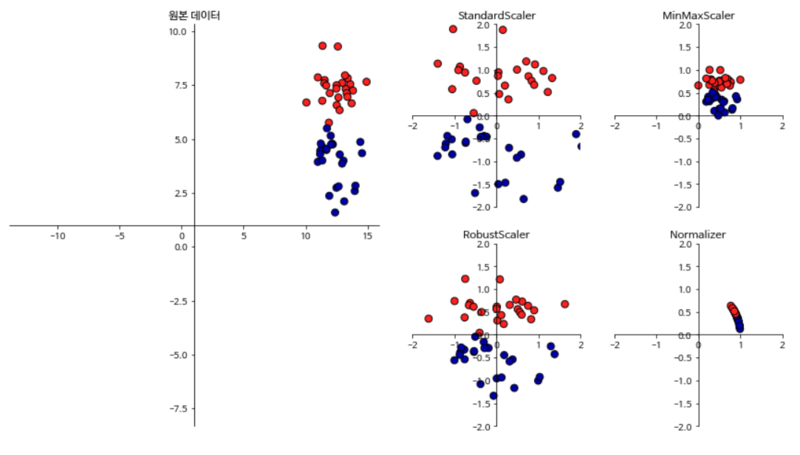

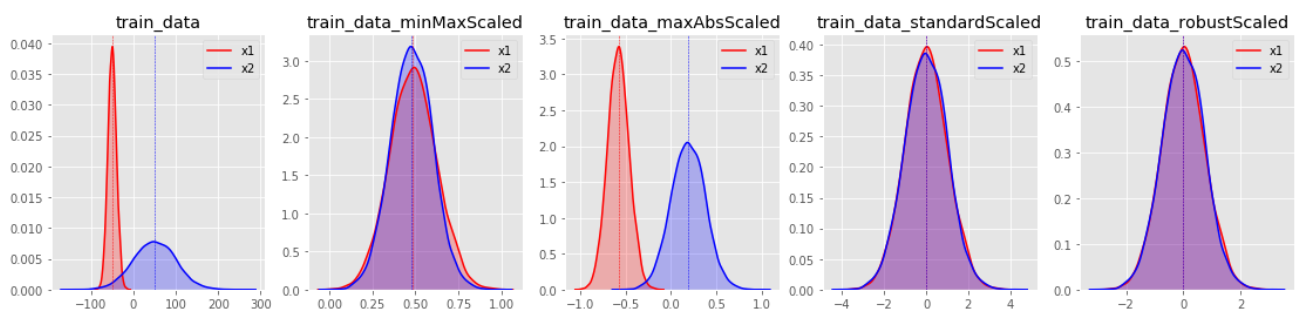

Scikit-Learn 에서는 다양한 종류의 스케일러를 제공하고있다.

1. StandardScaler : 기본 스케일. 평균과 표준편차 사용
2. MinMaxScaler : 최대 / 최소값이 각각 1, 0이 되도록 스케일링
3. MaxAbsScaler : 최대절대값과 0이 각각 1, 0이 되도록 스케일링
4. RobustScaler : 중앙값(median)과 IQR(interquartile range) 사용, 아웃라이어의 영향을 최소화


## 1.StandardScaler





평균을 제거하고 데이터를 단위 분산으로 조정한다. 그러나 이상치가 있다면 평균과 표준편차에 영향을 미쳐 변환된 데이터의 확산은 매우 달라지게 된다.

따라서 이상치가 있는 경우 균형 잡힌 척도를 보장할 수 없다.

```
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
print(standardScaler.fit(train_data))
train_data_standardScaled = standardScaler.transform(train_data)

```


##2.MinMaxScaler


모든 feature 값이 0~1사이에 있도록 데이터를 재조정한다. 다만 이상치가 있는 경우 변환된 값이 매우 좁은 범위로 압축될 수 있다.

즉, MinMaxScaler 역시 아웃라이어의 존재에 매우 민감하다.



```
from sklearn.preprocessing import MinMaxScaler
minMaxScaler = MinMaxScaler()
print(minMaxScaler.fit(train_data))
train_data_minMaxScaled = minMaxScaler.transform(train_data)
```



## 3.MaxAbsScaler


절대값이 0부터 1사이에 매핑되도록 한다. 즉 -1부터 1 사이로 재조정한다. 

양수 데이터로만 구성된 특징 데이터셋에서는 MinMaxScaler와 유사하게 동작하며, 큰 이상치에 민감할 수 있다.



```
from sklearn.preprocessing import MaxAbsScaler
maxAbsScaler = MaxAbsScaler()
print(maxAbsScaler.fit(train_data))
train_data_maxAbsScaled = maxAbsScaler.transform(train_data)

```



##4.RobustScaler


아웃라이어의 영향을 최소화한 기법이다. 중앙값(median)과 IQR(interquartile range)을 사용하기 때문에 StandardScaler와 비교해보면 표준화 후 동일한 값을 더 넓게 분포 시키고 있음을 확인 할 수 있다.

IQR = Q3 - Q1 : 즉, 25퍼센타일과 75퍼센타일의 값들을 다룬다.

아웃라이어를 포함하는 데이터의 표준화 결과는 아래와 같다.

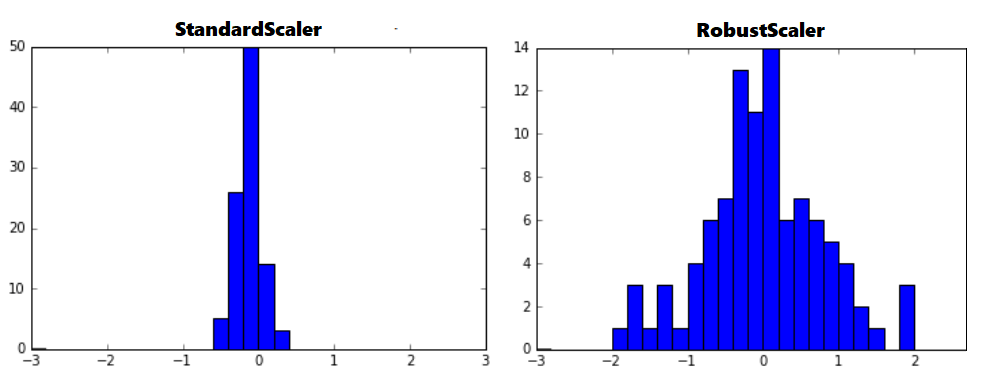



```
from sklearn.preprocessing import RobustScaler
robustScaler = RobustScaler()
print(robustScaler.fit(train_data))
train_data_robustScaled = robustScaler.transform(train_data)

```



결론적으로 모든 스케일러 처리 전에는 아웃라이어 제거가 선행되어야 한다. 또한 데이터의 분포 특징에 따라 적절한 스케일러를 적용해주는 것이 좋다.

